#  Importing Packages

In [192]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [193]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
   # ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Data collection 

In [194]:
gender_sub=pd.read_csv("data/gender_submission.csv")
train_data=pd.read_csv("data/train.csv")
test_data=pd.read_csv("data/test.csv")

In [195]:
gender_sub.head(5)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [196]:
train_data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


# Data Cleaning

In [197]:
test_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [198]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


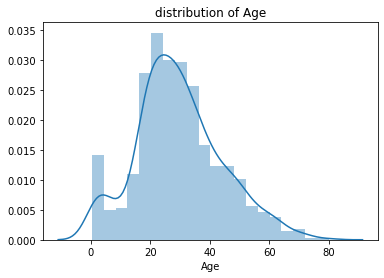

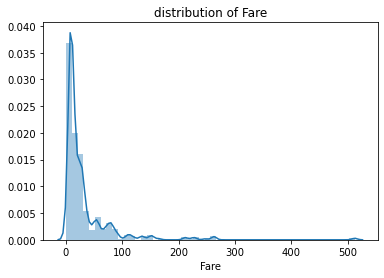

In [199]:
#Distribution graph
arr_denisty=['Age','Fare']
for i in arr_denisty:
    sns.distplot(train_data[i])
    plt.title(f'distribution of {i}')
    plt.show()

In [200]:
combine=[train_data,test_data]
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
train_data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Jonkheer      1
Sir           1
Countess      1
Mme           1
Don           1
Lady          1
Ms            1
Name: Title, dtype: int64

In [201]:
train_data.replace(['Ms','Mlle'],'Miss',inplace=True)
train_data.replace(['Mme'],'Mrs',inplace=True)
test_data.replace(['Ms','Mlle'],'Miss',inplace=True)
test_data.replace(['Mme'],'Mrs',inplace=True)
train_data.replace(['Jonkheer','Countess','Capt','Sir','Lady','Don','Col','Major'],'Rare',inplace=True)
test_data.replace(['Jonkheer','Countess','Capt','Sir','Lady','Don','Col','Major'],'Rare',inplace=True)
train_data.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       10
Dr          7
Rev         6
Name: Title, dtype: int64

In [202]:
object=train_data.select_dtypes(include='object')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train_data["Title"]=le.fit_transform(train_data["Title"])
test_data["Title"]=le.fit_transform(test_data["Title"])    


In [203]:
# Controlling Missing values in dataset
train_data.isnull().sum()/train_data.count()*100

PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age             24.789916
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin          336.764706
Embarked         0.224972
Title            0.000000
dtype: float64

In [204]:
#Identify which columns are numerical and categorical:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title            int64
dtype: object

## Dealing with the Nan values

In [205]:
# calculating the mean of age column
age_mean=train_data["Age"].astype("float").mean(axis=0) # getting the age values mean
train_data.replace(np.nan,age_mean,inplace=True)
# same process for fare
fare_mean=train_data["Fare"].astype("float").mean(axis=0)
train_data.replace(np.nan,fare_mean,inplace=True)

# SAME PROCESS FOR TEST SET
# calculating the mean of age column
age_mean=test_data["Age"].astype("float").mean(axis=0) # getting the age values mean
test_data.replace(np.nan,age_mean,inplace=True)
# same process for fare
fare_mean=test_data["Fare"].astype("float").mean(axis=0)
test_data.replace(np.nan,fare_mean,inplace=True)

In [206]:
y=train_data["Survived"].to_numpy()

y[0:100]



array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [207]:
train_data["Sex"].replace("male",0,inplace=True)
train_data["Sex"].replace("female",1,inplace=True)
test_data["Sex"].replace("male",0,inplace=True)
test_data["Sex"].replace("female",1,inplace=True)
train_data["Sex"].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [208]:
train_data["Embarked"].replace("S",0,inplace=True)
train_data["Embarked"].replace("C",1,inplace=True)
train_data["Embarked"].replace("Q",2,inplace=True)
train_data["Embarked"]

test_data["Embarked"].replace("S",0,inplace=True)
test_data["Embarked"].replace("C",1,inplace=True)
test_data["Embarked"].replace("Q",2,inplace=True)


In [209]:
X=train_data[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Title"]]
X_test=test_data[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Title"]]
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,3,0,22.000000,1,0,7.2500,0.0,3
1,2,1,1,38.000000,1,0,71.2833,1.0,4
2,3,3,1,26.000000,0,0,7.9250,0.0,2
3,4,1,1,35.000000,1,0,53.1000,0.0,4
4,5,3,0,35.000000,0,0,8.0500,0.0,3
...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,0.0,6
887,888,1,1,19.000000,0,0,30.0000,0.0,2
888,889,3,1,29.699118,1,2,23.4500,0.0,2
889,890,1,0,26.000000,0,0,30.0000,1.0,3


In [210]:
# Normalize training
transform=preprocessing.StandardScaler()
X=transform.fit(X).transform(X)
X_test=transform.fit(X_test).transform(X_test)
X

array([[-1.73010796,  0.82737724, -0.73769513, ..., -0.50244517,
        -0.28037604,  0.16530862],
       [-1.72622007, -1.56610693,  1.35557354, ...,  0.78684529,
         0.37462188,  1.37260352],
       [-1.72233219,  0.82737724,  1.35557354, ..., -0.48885426,
        -0.28037604, -1.04198629],
       ...,
       [ 1.72233219,  0.82737724,  1.35557354, ..., -0.17626324,
        -0.28037604, -1.04198629],
       [ 1.72622007, -1.56610693, -0.73769513, ..., -0.04438104,
         0.37462188,  0.16530862],
       [ 1.73010796,  0.82737724, -0.73769513, ..., -0.49237783,
         1.0296198 ,  0.16530862]])

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


# LOGISTIC REGRESSION

In [212]:
parameters={"C":[0.01,0.1,1],"penalty":["l2"],'solver':['lbfgs']}
lr= LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [213]:
print("Test_score",logreg_cv.score(x_test,y_test))
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Test_score 0.7597765363128491
tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8047926447574335


# KNN

In [214]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [215]:

knn_cv=GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [216]:
print("Test_score",knn_cv.score(x_test,y_test))
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

Test_score 0.8603351955307262
tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.830561797752809


# TREE

In [217]:
tree = DecisionTreeClassifier()

In [218]:
#tree_cv=GridSearchCV(tree,parameters,cv=10)
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [219]:
tree.score(x_train,y_train)
print("Test_score",tree.score(x_test,y_test))

Test_score 0.770949720670391


In [220]:
result_tree=tree.predict(x_test)
yhat=result_tree.astype("int")

# Random Forest

In [256]:
model_forest=RandomForestClassifier(n_estimators=100)
model_forest.fit(x_train,y_train)


RandomForestClassifier()

In [257]:
print("Test_score",model_forest.score(x_test,y_test))

Test_score 0.8100558659217877


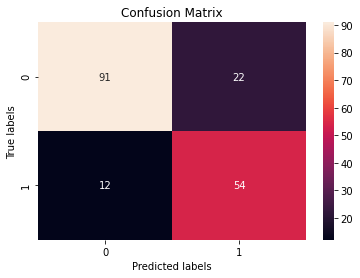

In [258]:
result=model_forest.predict(x_test)
plot_confusion_matrix(y_test,result)
yhat=model_forest.predict(X_test)

# ANN

In [224]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.2


In [225]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [229]:
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [230]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
72/72 [==============================] - 1s 1ms/step - loss: 0.6396 - accuracy: 0.6250
Epoch 2/150
72/72 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.7219
Epoch 3/150
72/72 [==============================] - 0s 1ms/step - loss: 0.5348 - accuracy: 0.7921
Epoch 4/150
72/72 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.8020
Epoch 5/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.8076
Epoch 6/150
72/72 [==============================] - 0s 961us/step - loss: 0.4723 - accuracy: 0.8090
Epoch 7/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8146
Epoch 8/150
72/72 [==============================] - 0s 884us/step - loss: 0.4453 - accuracy: 0.8160
Epoch 9/150
72/72 [==============================] - 0s 965us/step - loss: 0.4348 - accuracy: 0.8202
Epoch 10/150
72/72 [==============================] - 0s 968us/step - loss: 0.4262 - accuracy: 0.8301
E

In [234]:
# evaluate the keras model
_, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))

6/6 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.7709
Test Accuracy: 77.09


In [233]:
ann_results= model.predict(x_test)
ann_results[ann_results<0.5] = 0
ann_results[ann_results>=0.5] = 1
#yhat=ann_results.astype("int")


## Submitting CSV

In [238]:
test_data["PassengerId"]

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [239]:
yhat.size


179

In [259]:

result= pd.DataFrame(test_data["PassengerId"].values,columns=["PassengerId"])
result


,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [260]:
yhat.size

418

In [261]:
result.insert(1,"Survived",yhat)
result


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [262]:
result.to_csv('result.csv', index=False)